### My approach is to first train a standard ResNet-18 model to evaluate its maximum achievable accuracy. After obtaining the results, I will design a custom ResNet-15 architecture by reducing the number of layers from 18 to 15. Finally, I will compare the performance of different resnet15 models and select the one that performs best.


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from torch.utils.data import Dataset, DataLoader
import warnings


LETS first see what  our data  look like and  take insights from it . each photon  and electron data has 'X' and 'Y' keys X has the two  32*32 and in total 24900 images one is for Hit Energy  and other is for time . the Y has labeling of the data . from data we can see photon  has Y is 0 and for electron it is 1.

In [6]:
import h5py

file_path = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"

with h5py.File(file_path, 'r') as file:
    print(list(file.keys())) 


['X', 'y']


<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\DELL\AppData\Local\Temp\ipykernel_16192\1914313947.py:3: SyntaxWarning: invalid escape sequence '\M'
  file_path = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"


In [ ]:

import numpy as np

file_path = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"

with h5py.File(file_path, 'r') as file:
    # Print available keys
    print("Keys in the HDF5 file:", list(file.keys()))


    X = file['X'][:]  # Images
    y = file['y'][:]  # Labels

    # Print shape of data
    print("Shape of X (Images):", X.shape)
    print("Shape of y (Labels):", y.shape)

    # Print a few samples
    print("\nFirst 5 labels:", y[:5])
    print("First image matrix (channel 0):\n", X[0, 0])  # Print first image's first channel
    print("First image matrix (channel 1):\n", X[0, 1])  # Print first image's second channel


Keys in the HDF5 file: ['X', 'y']
Shape of X (Images): (249000, 32, 32, 2)
Shape of y (Labels): (249000,)

First 5 labels: [0. 0. 0. 0. 0.]
First image matrix (channel 0):
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
First image matrix (channel 1):
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [ ]:
# import h5py
# import numpy as np

#file paths
photon_file = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"
electron_file = "D:/ML4SCI_CMS/CommonTask1/electron_data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5"

def inside_file(file_path, particle_name):
    print(f"\nInspecting {particle_name} Data:")
    
    with h5py.File(file_path, 'r') as file:
        print("Keys in our data", list(file.keys()))

        X = file['X'][:]  # images
        y = file['y'][:]  # labels

        #shape of the data
        print(f"Shape of X (Images) for {particle_name}:", X.shape)
        print(f"Shape of y (Labels) for {particle_name}:", y.shape)

        # Print a few labels
        print("\nFirst 5 labels:", y[:5])

        # Print the first image data
    print("First image matrix (channel 0 - Energy):\n", X[9, :, :, 0])  
    print("First image matrix (channel 1 - Time):\n", X[9, :, :, 1])



# Inspect both datasets
# inside_file(photon_file, "Proton")
inside_file(electron_file, "Electron")
print("Max value in X:", X.max())
print("Min value in X:", X.min())
print("Unique values in X:", np.unique(X))



<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Dell\AppData\Local\Temp\ipykernel_18784\965003609.py:5: SyntaxWarning: invalid escape sequence '\M'
  photon_file = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"



Inspecting Electron Data:
Keys in our data ['X', 'y']
Shape of X (Images) for Electron: (249000, 32, 32, 2)
Shape of y (Labels) for Electron: (249000,)

First 5 labels: [1. 1. 1. 1. 1.]
First image matrix (channel 0 - Energy):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First image matrix (channel 1 - Time):
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Max value in X: 2.2779698
Min value in X: -2.512557
Unique values in X: [-2.512557  -2.5119429 -2.5072434 ...  2.251859   2.2702272  2.2779698]


<>:7: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Dell\AppData\Local\Temp\ipykernel_18784\768053624.py:7: SyntaxWarning: invalid escape sequence '\M'
  photon_path = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"


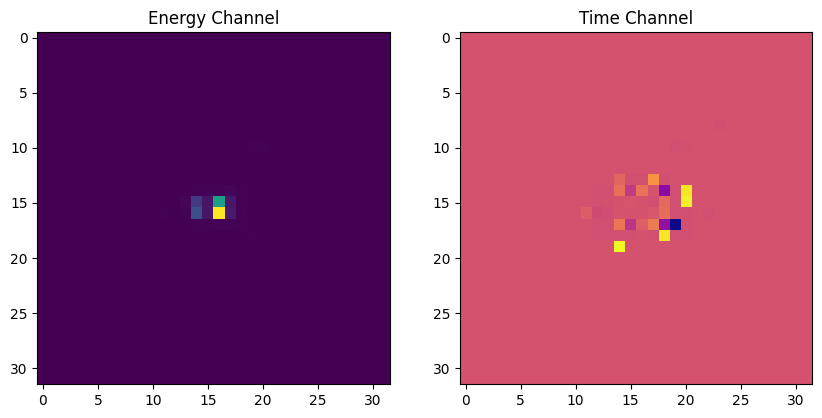

In [14]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Load the electron dataset
electron_path = "D:/ML4SCI_CMS/CommonTask1/electron_data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5"
photon_path = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"


with h5py.File(electron_path, 'r') as file:
    X_electron = file['X'][:]  # Load images
    y_electron = file['y'][:]  # Load labels

# first image 
image = X[0]  #shapee (32, 32, 2)

# plot of both hit energy  and time channels
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# channel0  - hit energy
axes[0].imshow(image[:, :, 0], cmap='viridis')
axes[0].set_title("Energy Channel")

# channel1 - Time
axes[1].imshow(image[:, :, 1], cmap='plasma')
axes[1].set_title("Time Channel")

plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Dell\AppData\Local\Temp\ipykernel_18784\1838978782.py:6: SyntaxWarning: invalid escape sequence '\M'
  photon_path = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"


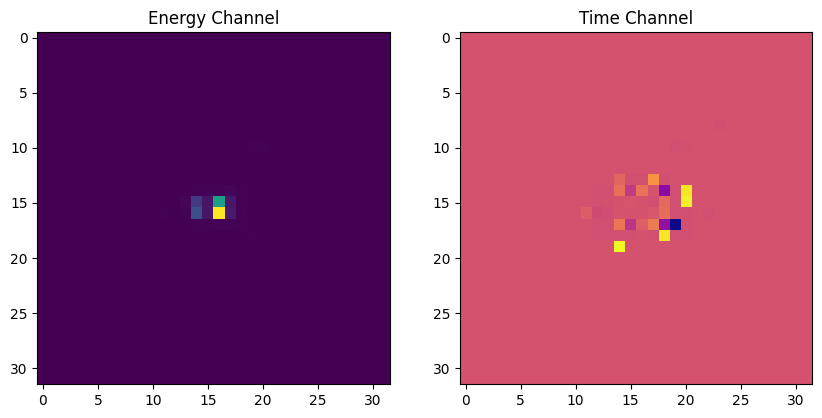

In [15]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# load photon data
photon_path = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"


with h5py.File(photon_path, 'r') as file:
    X_photon = file['X'][:]  # Load images
    y_photon= file['y'][:]  # load labels

# first image 
image = X[0]  #shapee (32, 32, 2)

# plot of both hit energy  and time channels
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# channel0  - hit energy
axes[0].imshow(image[:, :, 0], cmap='viridis')
axes[0].set_title("Energy Channel")

# channel1 - Time
axes[1].imshow(image[:, :, 1], cmap='plasma')
axes[1].set_title("Time Channel")

plt.show()

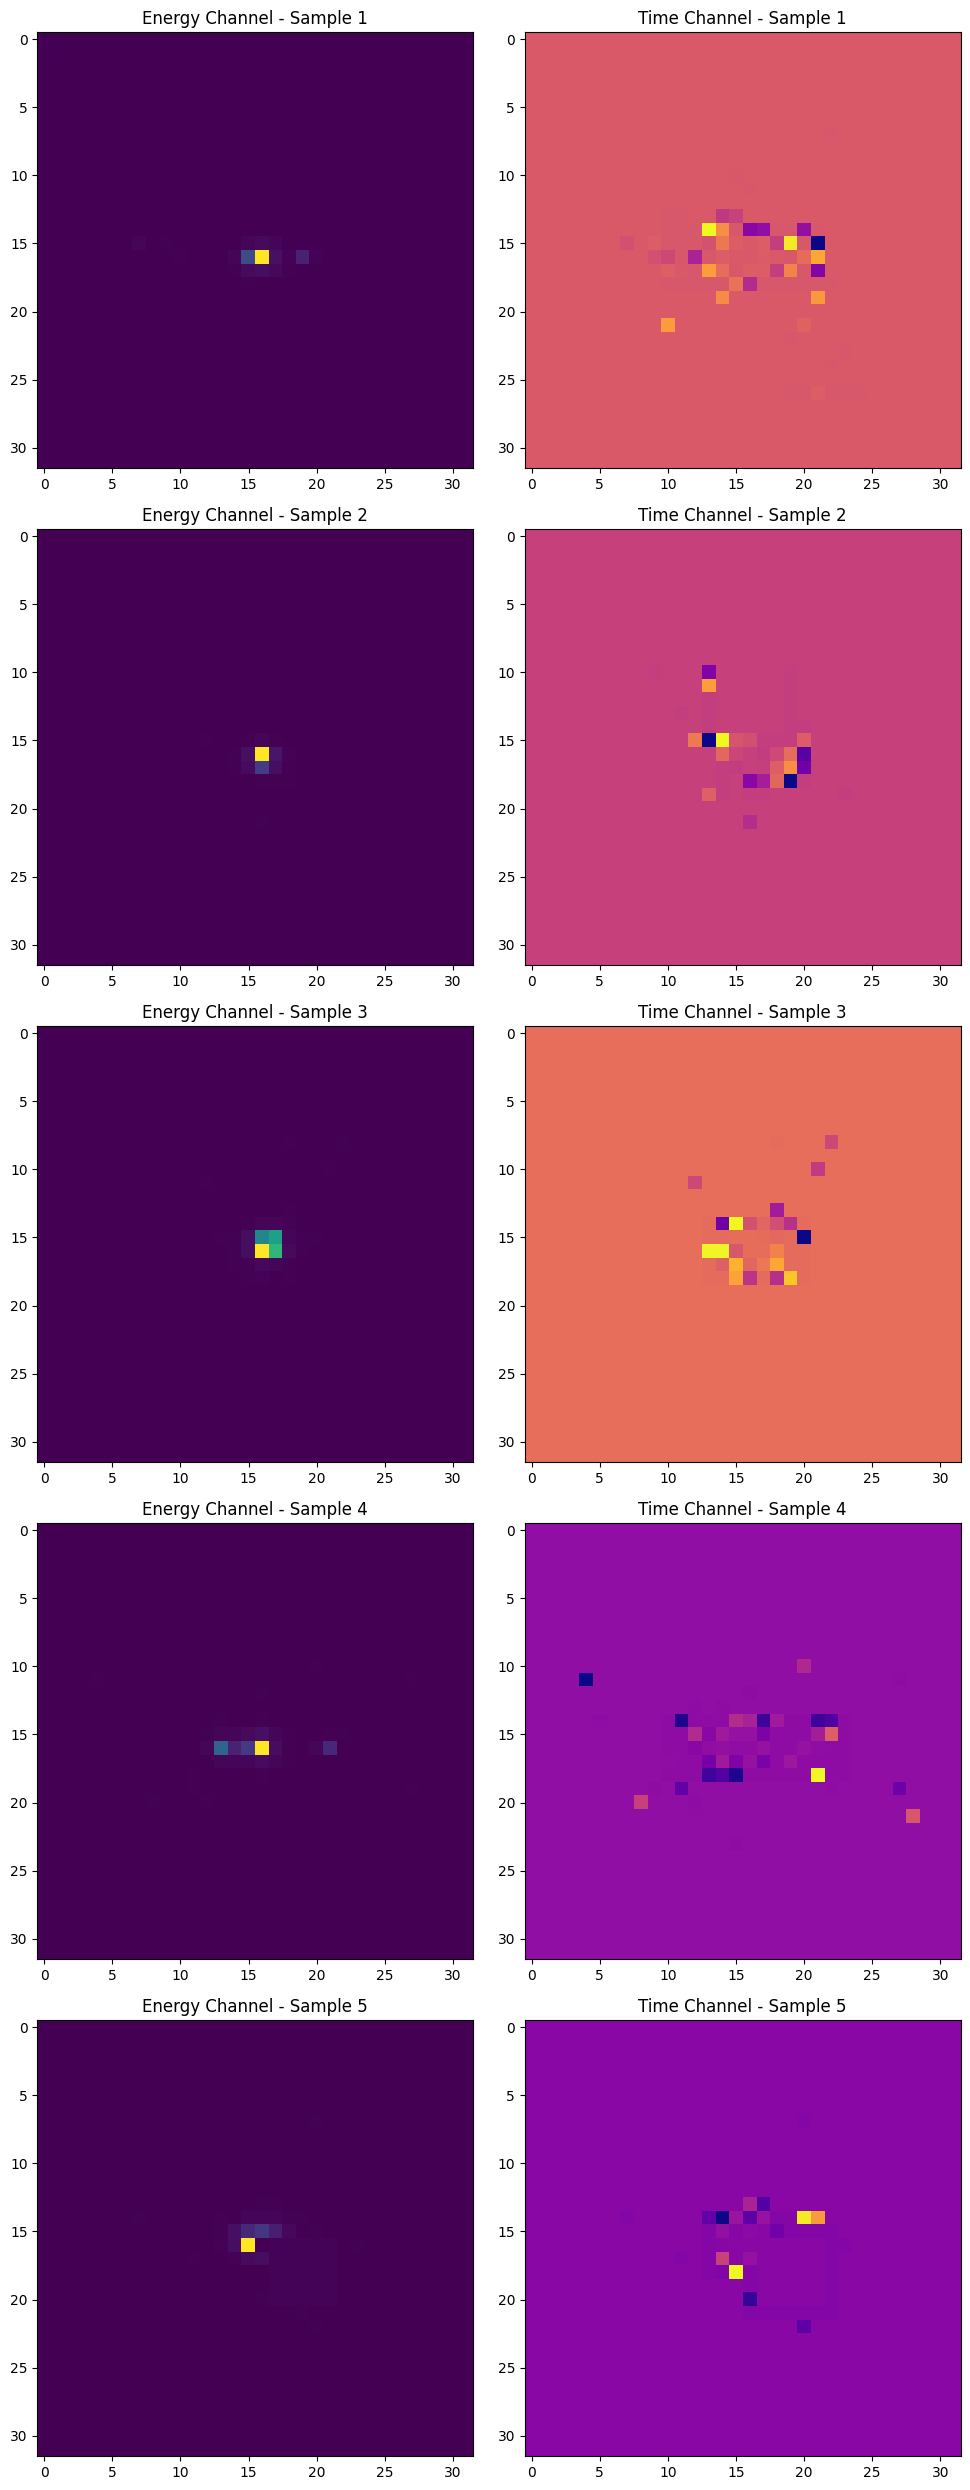

In [16]:
num_images = 5  #displaying first 5 images of electron

fig, axes = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))

for i in range(num_images):
    image = X_electron[i]  # Select image i

    # Energy Channel
    axes[i, 0].imshow(image[:, :, 0], cmap='viridis')
    axes[i, 0].set_title(f"Energy Channel - Sample {i+1}")

    # Time Channel
    axes[i, 1].imshow(image[:, :, 1], cmap='plasma')
    axes[i, 1].set_title(f"Time Channel - Sample {i+1}")

plt.tight_layout()
plt.show()


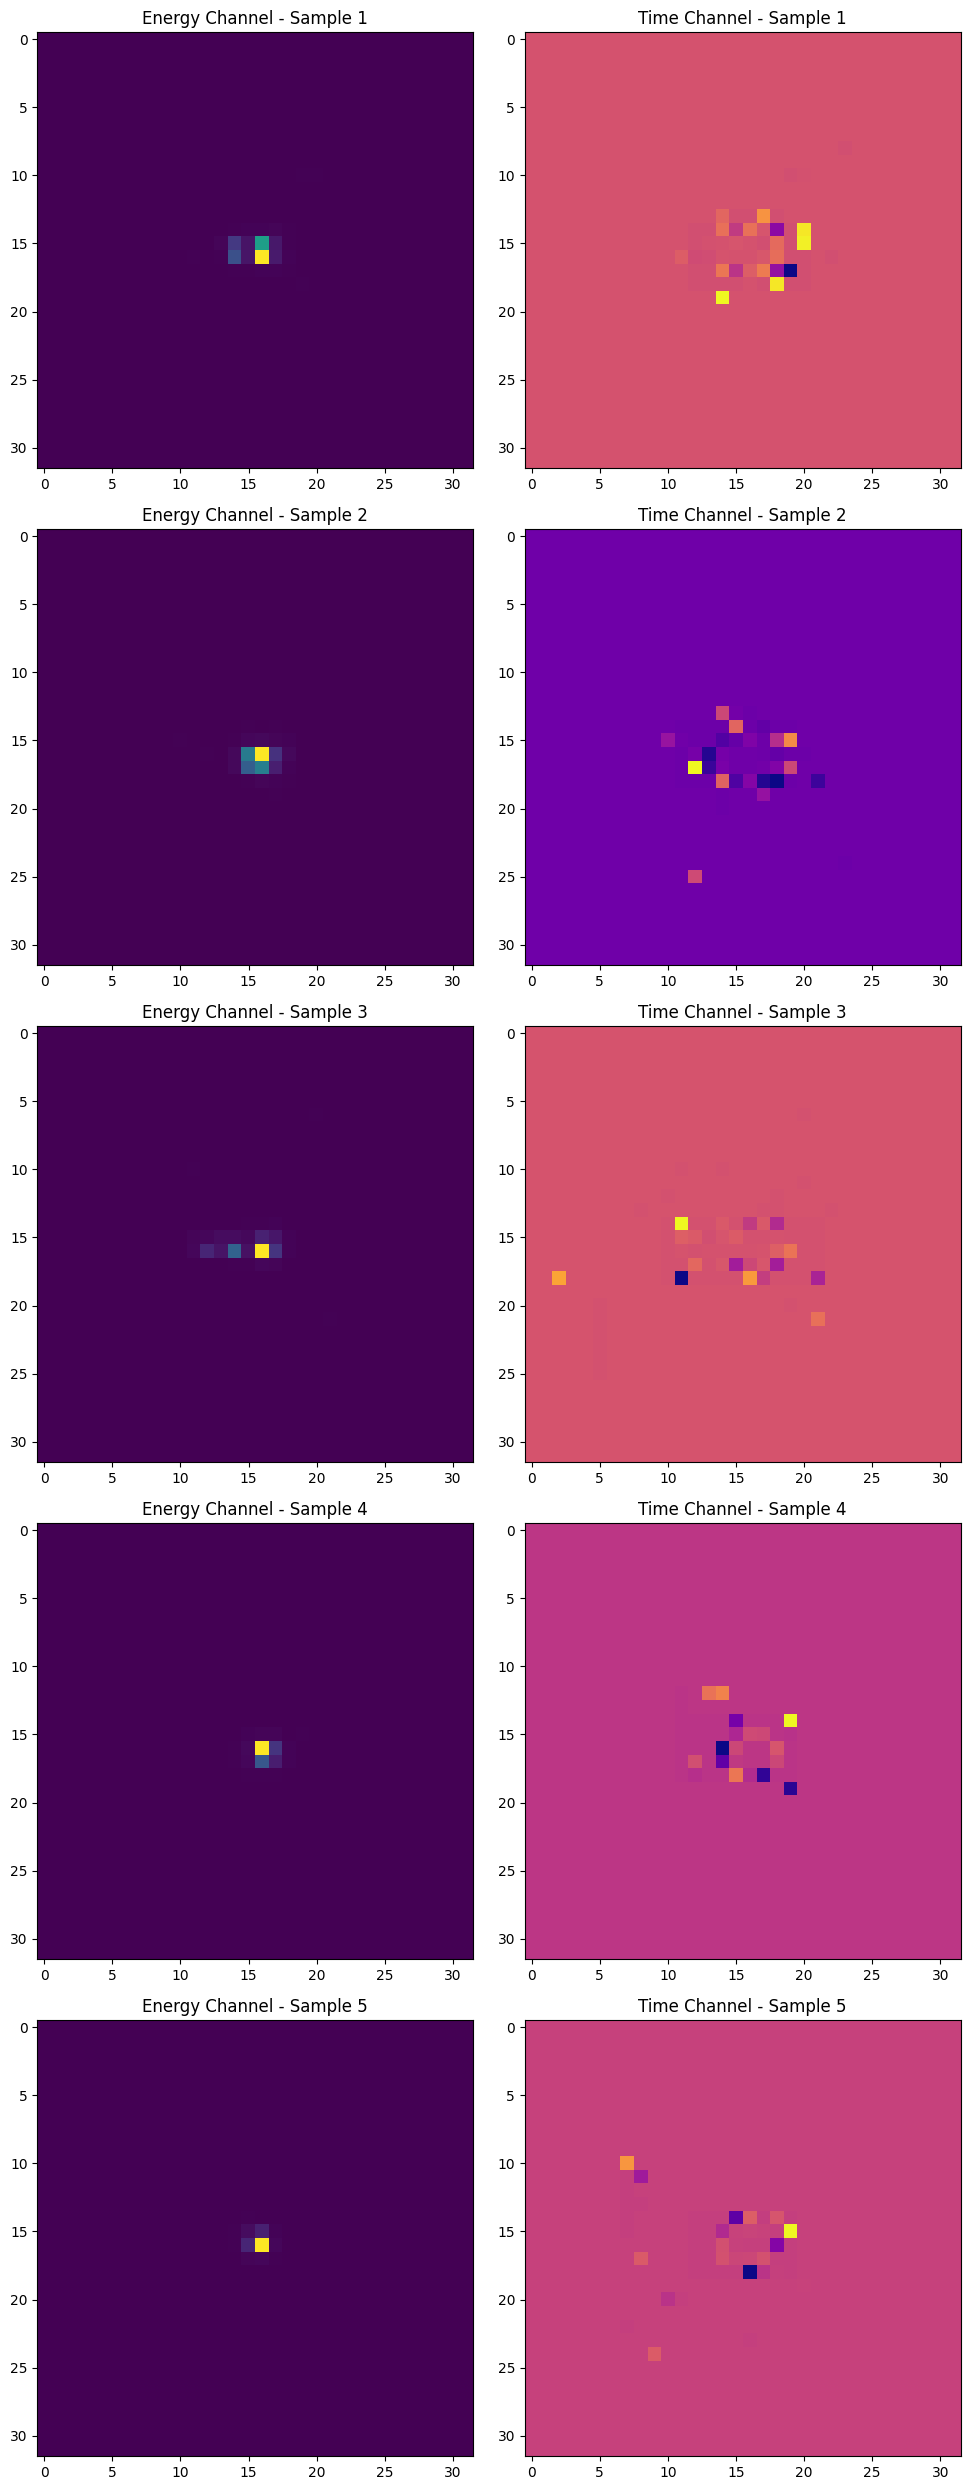

In [17]:
#displaying first 5 images of photon 
num_images = 5  #displaying first 5 images of electron

fig, axes = plt.subplots(num_images, 2, figsize=(10, 5 * num_images))

for i in range(num_images):
    image = X_photon[i]  # Select image i

    # Energy Channel
    axes[i, 0].imshow(image[:, :, 0], cmap='viridis')
    axes[i, 0].set_title(f"Energy Channel - Sample {i+1}")

    # Time Channel
    axes[i, 1].imshow(image[:, :, 1], cmap='plasma')
    axes[i, 1].set_title(f"Time Channel - Sample {i+1}")

plt.tight_layout()
plt.show()


### INSIGHTS FROM THE DATA 
### How Can Energy and Time Be Used to Classify Electrons and Photons?
Even though the data looks like images (a grid of values), it actually captures the physics of particle interactions:

Electrons interact more frequently and leave a broader spread of energy in the detector.

Photons convert into electron-positron pairs, which means their energy deposition pattern is different from a direct electron hit.

Time Information is useful because photons tend to interact slightly differently in the detector compared to electrons.


In [20]:
import h5py
#data transformation and normalization

# file paths
photon_file = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"
electron_file = "D:/ML4SCI_CMS/CommonTask1/electron_data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5"

# Load Photon Data
with h5py.File(photon_file, 'r') as f:
    X_photon = f['X'][:]  # Load images
    y_photon = f['y'][:]  # Load labels

# Load Electron Data
with h5py.File(electron_file, 'r') as f:
    X_electron = f['X'][:]  # Load images
    y_electron = f['y'][:]  # Load labels

# select  50,000 random samples from each
num_samples = 50000

photon_indices = np.random.choice(len(X_photon), num_samples, replace=False)
electron_indices = np.random.choice(len(X_electron), num_samples, replace=False)

X_photon = X_photon[photon_indices]
y_photon = y_photon[photon_indices]

X_electron = X_electron[electron_indices]
y_electron = y_electron[electron_indices]




<>:5: SyntaxWarning: invalid escape sequence '\M'
<>:5: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Dell\AppData\Local\Temp\ipykernel_18784\1230802694.py:5: SyntaxWarning: invalid escape sequence '\M'
  photon_file = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"


In [ ]:
# combine photon and electon data 
X_combined = np.concatenate([X_photon, X_electron], axis=0)
y_combined = np.concatenate([y_photon, y_electron], axis=0)

# shuffle the dataset so that our model is not biased
shuffle_indices = np.random.permutation(len(X_combined))
X_combined = X_combined[shuffle_indices]
y_combined = y_combined[shuffle_indices]

# finding mean and std for both channels (Energy & Time)
mean = np.mean(X_combined, axis=(0, 1, 2))  # Mean across all images
std = np.std(X_combined, axis=(0, 1, 2))    # Standard deviation across all images

print("Mean:", mean)
print("Standard Deviation:", std)




Mean: [ 0.00119859 -0.00024965]
Standard Deviation: [0.02364929 0.06723896]


In [23]:
#using transform to create tensor obj  and normalization  of data 
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.00119859 , -0.00024965], std=[0.02364929, 0.06723896])  
])

# Define ParticleDataset
class ParticleDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx]  # Image shape: (32, 32, 2)
        label = self.y[idx]  # Class: 0 (proton) or 1 (electron)

        if self.transform:
            image = self.transform(image)

        return image, label

# Apply transformations
dataset = ParticleDataset(X_combined, y_combined, transform=transform)

# Split into Train (80%) and Validation (20%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

print("dataloader creater with  normalization")

dataloader creater with  normalization


In [ ]:
import time
class ResNet18Binary(nn.Module):
    def __init__(self):
        super(ResNet18Binary, self).__init__()
        self.model = models.resnet18(pretrained=False)  # No pretrained weights
        self.model.conv1 = nn.Conv2d(2, 64, kernel_size=7, stride=2, padding=3, bias=False)  # 2-channel input
        self.model.fc = nn.Linear(self.model.fc.in_features, 1)  # Binary classification

    def forward(self, x):
        return self.model(x)

# model,lLoss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18Binary().to(device)
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam Optimizer


def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.train()
    best_acc = 0.0

    for epoch in range(num_epochs):
        start_time = time.time()
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)  # Ensure labels are float
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            predicted = torch.sigmoid(outputs) > 0.5  # Convert logits to 0/1
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        val_acc = evaluate_model(model, val_loader)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Time: {time.time()-start_time:.2f}s")

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_resnet18_model.pth")  # Save best model

# evaluation Function
def evaluate_model(model, val_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            predicted = torch.sigmoid(outputs) > 0.5
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    return correct / total

# Train the Model
num_epochs = 10
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch [1/10], Loss: 0.6611, Train Acc: 0.6117, Val Acc: 0.6440, Time: 597.37s
Epoch [2/10], Loss: 0.6314, Train Acc: 0.6502, Val Acc: 0.6536, Time: 430.28s
Epoch [3/10], Loss: 0.6063, Train Acc: 0.6792, Val Acc: 0.6860, Time: 435.86s
Epoch [4/10], Loss: 0.5955, Train Acc: 0.6921, Val Acc: 0.6892, Time: 443.70s
Epoch [5/10], Loss: 0.5873, Train Acc: 0.6985, Val Acc: 0.6920, Time: 450.70s
Epoch [6/10], Loss: 0.5789, Train Acc: 0.7050, Val Acc: 0.6913, Time: 455.24s
Epoch [7/10], Loss: 0.5725, Train Acc: 0.7119, Val Acc: 0.6946, Time: 459.63s
Epoch [8/10], Loss: 0.5644, Train Acc: 0.7185, Val Acc: 0.6924, Time: 457.46s
Epoch [9/10], Loss: 0.5539, Train Acc: 0.7247, Val Acc: 0.6922, Time: 463.12s
Epoch [10/10], Loss: 0.5420, Train Acc: 0.7347, Val Acc: 0.6875, Time: 468.71s


TESTING OUR RESNET18  MODEL AND TAKING INSIGHTS ON WHICH LAYER TO  REMOVE TO  GET OUR  BEST FIT RESNET 15 MODEL

In [ ]:
## testing the  model
import h5py
import numpy as np

#data transformation and normalization

# File paths
photon_file = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"
electron_file = "D:/ML4SCI_CMS/CommonTask1/electron_data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5"

# Load Photon Data
with h5py.File(photon_file, 'r') as f:
    X_photon = f['X'][:]  # Load images
    y_photon = f['y'][:]  # Load labels

# Load Electron Data
with h5py.File(electron_file, 'r') as f:
    X_electron = f['X'][:]  # Load images
    y_electron = f['y'][:]  # Load labels

# Select 5,000 random samples from each
num_samples = 5000

photon_indices = np.random.choice(len(X_photon), num_samples, replace=False)
electron_indices = np.random.choice(len(X_electron), num_samples, replace=False)

X_photon = X_photon[photon_indices]
y_photon = y_photon[photon_indices]

X_electron = X_electron[electron_indices]
y_electron = y_electron[electron_indices]

X_combined = np.concatenate([X_photon, X_electron], axis=0)
y_combined = np.concatenate([y_photon, y_electron], axis=0)

# Shuffle the dataset so that model not get baised
shuffle_indices = np.random.permutation(len(X_combined))
X_combined = X_combined[shuffle_indices]
y_combined = y_combined[shuffle_indices]


mean = np.mean(X_combined, axis=(0, 1, 2))  # Mean across all images
std = np.std(X_combined, axis=(0, 1, 2))    # Standard deviation across all images

print("Mean:", mean)
print("Standard Deviation:", std)





<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Dell\AppData\Local\Temp\ipykernel_18784\4049288855.py:8: SyntaxWarning: invalid escape sequence '\M'
  photon_file = "D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"


Mean: [ 0.00121583 -0.00024849]
Standard Deviation: [0.0236833  0.06727916]


In [29]:
import torch

# x_combined is a tensor
if isinstance(X_combined, np.ndarray):  
    X_combined = torch.tensor(X_combined, dtype=torch.float32)

print("X_combined shape before permute:", X_combined.shape)

#  format shouldbe in batch channels, height, width
X_combined = X_combined.permute(0, 3, 1, 2)

print("X_combined shape after permute:", X_combined.shape)

# Define mean and std as tensors
mean = torch.tensor([0.00121583, -0.00024849], dtype=torch.float32).view(1, 2, 1, 1)  
std = torch.tensor([0.0236833 , 0.06727916], dtype=torch.float32).view(1, 2, 1, 1)  

print("Mean shape:", mean.shape)  
print("Std shape:", std.shape)  

# Normalize
X_combined = (X_combined - mean) / std



X_combined shape before permute: torch.Size([10000, 32, 32, 2])
X_combined shape after permute: torch.Size([10000, 2, 32, 32])
Mean shape: torch.Size([1, 2, 1, 1])
Std shape: torch.Size([1, 2, 1, 1])


In [30]:
import torch
from torchvision import models
import torch.nn as nn

#  Define ResNet-18 Model for Binary Classification (Same as Training)
class ResNet18Binary(nn.Module):
    def __init__(self):
        super(ResNet18Binary, self).__init__()
        self.model = models.resnet18(pretrained=False)  #no pretrained weights
        self.model.conv1 = nn.Conv2d(2, 64, kernel_size=7, stride=2, padding=3, bias=False)  # 2-channel input
        self.model.fc = nn.Linear(self.model.fc.in_features, 1)  # Binary classification

    def forward(self, x):
        return self.model(x)

# Initialize Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18Binary().to(device)

#loading the model
checkpoint = torch.load("best_resnet18_model.pth", map_location=device)
model.load_state_dict(checkpoint)  # Ensure model structure matches

# evaluation Mode
model.eval()
print("Model loaded successfully!")



c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Model loaded successfully!


In [31]:
if X_combined.shape[1] == 32:
    X_combined = X_combined.permute(0, 3, 1, 2)  # formate should  be (B, C, H, W)
X_combined = X_combined.float()

print(f"Final X_combined shape: {X_combined.shape}, device: {X_combined.device}, dtype: {X_combined.dtype}")



Final X_combined shape: torch.Size([10000, 2, 32, 32]), device: cpu, dtype: torch.float32


In [32]:
import torch

# tensor obj
y_combined = torch.tensor(y_combined, dtype=torch.float32)

# device
y_combined = y_combined.to(device).unsqueeze(1)

print(f"y_combined shape: {y_combined.shape}, device: {y_combined.device}, dtype: {y_combined.dtype}")


y_combined shape: torch.Size([10000, 1]), device: cpu, dtype: torch.float32


In [33]:
import torch

# Load Trained Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet18Binary().to(device)
model.load_state_dict(torch.load("best_resnet18_model.pth", map_location=device))
model.eval()

# ensure x_combined & y_combined Exist and are on same Device
X_combined= X_combined.to(device)
y_combined = y_combined.to(device).float().unsqueeze(1)  # ensure shape matches output

# performance evaluation
with torch.no_grad():
    output = model(X_combined)  
    prediction = torch.sigmoid(output) > 0.5  # Convert logits to binary (0/1)

# accuracy
correct = (prediction == y_combined).sum().item()
total = y_combined.size(0)
accuracy = correct / total

# results
print(f"Model Output (Logits): {output.squeeze()}")
print(f"Predicted Probability: {torch.sigmoid(output).squeeze()}")
print(f"Predicted Class: {prediction.squeeze().int().tolist()}")
print(f"Ground Truth Labels: {y_combined.squeeze().int().tolist()}")
print(f"Test Accuracy: {accuracy:.4f}")


Model Output (Logits): tensor([ 0.2283, -0.5393,  0.3069,  ..., -0.9510,  0.6947,  1.3599])
Predicted Probability: tensor([0.5568, 0.3683, 0.5761,  ..., 0.2787, 0.6670, 0.7957])
Predicted Class: [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 

In [35]:

print(f"Prediction size: {prediction.size()}")
print(f"Ground truth size: {y_combined.size()}")
y_combined = y_combined.squeeze() #changing shape to 1000
#  Correct Calculation
correct = (prediction.squeeze() == y_combined).sum().item()
total = y_combined.size(0)
accuracy = correct / total


total = y_combined.size(0)
print(f"Total Samples: {total}")


print(f"Test Accuracy: {accuracy:.4f}")


Prediction size: torch.Size([10000, 1])
Ground truth size: torch.Size([10000, 1, 1])
Total Samples: 10000
Test Accuracy: 0.7001


In [36]:
print(model)

ResNet18Binary(
  (model): ResNet(
    (conv1): Conv2d(2, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, trac

### Now designing Resnet15 MODEL1

In [2]:
import h5py
import numpy as np
from  sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
from torch.utils.data import Dataset, DataLoader

In [ ]:
#file path
photon_file = r"D:\ML4SCI_CMS\CommonTask1\photon_data\SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5"
electron_file = r"D:\ML4SCI_CMS\CommonTask1\electron_data\SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5"

#load photon data
with h5py.File(photon_file, 'r') as f:
    X_photon = f['X'][:]  # Load images
    y_photon = f['y'][:]  # Load labels

#load electron data 
with h5py.File(electron_file, 'r') as f:
    X_electron = f['X'][:]
    y_electron = f['y'][:] 


# merge photon and electron data
X = np.concatenate((X_photon, X_electron), axis=0)
y = np.concatenate((y_photon, y_electron), axis=0)

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

NameError: name 'h5py' is not defined

In [5]:
xtrain_mean = np.mean(X_train,axis=(0, 1, 2))
xtrain_std = np.std(X_train,axis=(0, 1, 2))

print("Mean:",xtrain_mean)
print("Standard Deviation:", xtrain_std) 

Mean: [ 0.0011495  -0.00023346]
Standard Deviation: [0.02360971 0.06675196]


In [6]:
#using transform to create tensor obj  and normalization  of data 
transform = transforms.Compose([
    # transforms.Lambda(lambda x: torch.tensor(x, dtype=torch.float32).permute(2, 0, 1)),  #convert it to  channel height weight
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.0011495 , -0.00023346], std=[0.02360971, 0.06675196])  
])

# Define ParticleDataset
class ParticleDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx]  # Image shape: (32, 32, 2)
        label = self.y[idx]  # Class: 0 (proton) or 1 (electron)

        if self.transform:
            image = self.transform(image)

        return image, label

# Apply transformations
dataset = ParticleDataset(X_train, y_train, transform=transform)
datasett = ParticleDataset(X_test,y_test,transform=transform)
# dataloaders
Train_loader1 = DataLoader(dataset, batch_size=64, shuffle=True)
Test_loader1 = DataLoader(datasett, batch_size=64, shuffle=True)

print("dataloader creater with  normalization")

dataloader creater with  normalization


In [7]:
for images, labels in Train_loader1:
    print("\n=== Batch Verification ===")
    print("Batch shape:", images.shape)  # Should be (batch_size, 2, 32, 32)
    print("Labels:", labels)  # Verify correct label assignment
    print("\nSample Image Tensor (1st image):")
    print(images[0])
    print(" min/max:", images[0].min().item(), images[0].max().item())  # Check normalization range
    break  #one iteration only



=== Batch Verification ===
Batch shape: torch.Size([64, 2, 32, 32])
Labels: tensor([0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 1.])

Sample Image Tensor (1st image):
tensor([[[-0.0487, -0.0487, -0.0487,  ..., -0.0487, -0.0487, -0.0487],
         [-0.0487, -0.0487, -0.0487,  ..., -0.0487, -0.0487, -0.0487],
         [-0.0487, -0.0487, -0.0487,  ..., -0.0487, -0.0487, -0.0487],
         ...,
         [-0.0487, -0.0487, -0.0487,  ..., -0.0487, -0.0487, -0.0487],
         [-0.0487, -0.0487, -0.0487,  ..., -0.0487, -0.0487, -0.0487],
         [-0.0487, -0.0487, -0.0487,  ..., -0.0487, -0.0487, -0.0487]],

        [[ 0.0035,  0.0035,  0.0035,  ...,  0.0035,  0.0035,  0.0035],
         [ 0.0035,  0.0035,  0.0035,  ...,  0.0035,  0.0035,  0.0035],
         [ 0.003

In [13]:
import torch
import torch.nn as nn

# Residual Block 1 (Two conv layers)
class Block1(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(Block1, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        return torch.relu(out)

# Residual Block 2 (One conv layer)
class Block2(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(Block2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.bn1(self.conv1(x))
        out += self.shortcut(x)
        return torch.relu(out)

# ResNet-15 Architecture
class ResNet15(nn.Module):
    def __init__(self, num_classes=2):
        super(ResNet15, self).__init__()
        self.conv1 = nn.Conv2d(2, 64, kernel_size=3, stride=1, padding=1, bias=False) 
        self.bn1 = nn.BatchNorm2d(64)
        
        self.layer1 = self.make_layer1(64, 64, stride=1)   # Block1 → Block2
        self.layer2 = self.make_layer1(64, 128, stride=2)  # Block1 → Block2
        self.layer3 = self.make_layer2(128, 256, stride=2) # Block1 → Block1
        self.layer4 = self.make_layer1(256, 512, stride=1) # Block1 → Block2
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def make_layer1(self, in_channels, out_channels, stride):
        return nn.Sequential(
            Block1(in_channels, out_channels, stride),
            Block2(out_channels, out_channels, stride=1)
        )
    def make_layer2(self, in_channels, out_channels, stride):
        return nn.Sequential(
            Block1(in_channels, out_channels, stride),
            Block1(out_channels, out_channels, stride=1)
        )
    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return self.fc(x)

# Create model instance
device = "cuda" if torch.cuda.is_available() else "cpu"
model = ResNet15(num_classes=2).to(device)

# Print model summary
print(model)


ResNet15(
  (conv1): Conv2d(2, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Block1(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): Block2(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
  )
  (layer2): Sequential(
    (0): Block1(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 

In [14]:
# device = "cuda" if torch.cuda.is_available() else "cpu"
model1 = ResNet15(num_classes=1).to(device)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Sigmoid and binary cross-entropy
optimizer = optim.AdamW(model1.parameters(), lr=0.001, weight_decay=1e-4)  # Better regularization

# Training loop
def train(model1, train_loader, criterion, optimizer, num_epochs=10):
    model1.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model1(images)
            loss = criterion(outputs.squeeze(), labels.float())  # Squeeze to match target shape

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            predicted = (torch.sigmoid(outputs) > 0.5).float()  # Apply sigmoid and threshold at 0.5
            total += labels.size(0)
            correct += (predicted.squeeze() == labels).sum().item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

# Testing loop
def test(model1, test_loader):
    model1.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model1(images)
            predicted = (torch.sigmoid(outputs) > 0.5).float()  # Apply sigmoid and threshold at 0.5
            total += labels.size(0)
            correct += (predicted.squeeze() == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")


# Start training
train(model1, Train_loader1, criterion, optimizer, num_epochs=25)

# After training, evaluate on the test set
test(model1, Test_loader1)

# Save the model1 after training
torch.save(model1.state_dict(), 'resnet15_model1.pth')

Epoch [1/25], Loss: 0.5982, Accuracy: 68.51%
Epoch [2/25], Loss: 0.5631, Accuracy: 71.72%
Epoch [3/25], Loss: 0.5544, Accuracy: 72.33%
Epoch [4/25], Loss: 0.5490, Accuracy: 72.73%
Epoch [5/25], Loss: 0.5443, Accuracy: 73.04%
Epoch [6/25], Loss: 0.5410, Accuracy: 73.20%
Epoch [7/25], Loss: 0.5380, Accuracy: 73.48%
Epoch [8/25], Loss: 0.5348, Accuracy: 73.66%
Epoch [9/25], Loss: 0.5325, Accuracy: 73.82%
Epoch [10/25], Loss: 0.5302, Accuracy: 73.96%
Epoch [11/25], Loss: 0.5278, Accuracy: 74.21%
Epoch [12/25], Loss: 0.5246, Accuracy: 74.39%
Epoch [13/25], Loss: 0.5218, Accuracy: 74.57%
Epoch [14/25], Loss: 0.5183, Accuracy: 74.75%
Epoch [15/25], Loss: 0.5139, Accuracy: 74.97%
Epoch [16/25], Loss: 0.5095, Accuracy: 75.33%
Epoch [17/25], Loss: 0.5035, Accuracy: 75.63%
Epoch [18/25], Loss: 0.4961, Accuracy: 76.10%
Epoch [19/25], Loss: 0.4869, Accuracy: 76.64%
Epoch [20/25], Loss: 0.4754, Accuracy: 77.30%
Epoch [21/25], Loss: 0.4606, Accuracy: 78.17%
Epoch [22/25], Loss: 0.4430, Accuracy: 79.1